In [1]:
import numpy as np 
import cv2 
import math
import matplotlib.pyplot as plt

def project(points, k):
    projm = np.zeros_like(points)
    mul = k/(k+points[:, -1])
    ones = np.ones((points.shape[0], 2))
    ones = ones*np.expand_dims(mul, axis=-1)
    zeros = np.zeros((points.shape[0], 1))
    projm = np.concatenate((ones, zeros), axis=1)
    rez = projm*points
    return rez[:, :-1]

def draw_cross(img, x, y, size=1, color=255, thickness=1):
    x, y = int(x), int(y)
    p1 = (x, y-size)
    p2 = (x, y+size)
    p3 = (x-size, y)
    p4 = (x+size, y)
    # print("color", color)
    img = cv2.line(img, p1, p2, int(color), thickness)
    img = cv2.line(img, p3, p4, int(color), thickness)
    return img

def draw_points(points, k, colors=None):
    img = np.zeros((200, 200))
    zbuff = np.zeros_like(img)+ float('inf')
    points = points + 300 #change maybee???
    proj_points = project(points, k).astype('int')
    if colors is None:
        colors = [255 for i in range(len(points))]
    for p, proj, color in zip(points, proj_points, colors):
        try:
            if zbuff[proj[0], proj[1]] > p[2]:
                zbuff[proj[0], proj[1]] = p[2]
                img = draw_cross(img, proj[0], proj[1], color=color)
        except:
            pass
    return img

def rotate_points(points, xalpha=0, yalpha=0, zalpha=0):
    sinx, cosx = math.sin(xalpha), math.cos(xalpha)
    siny, cosy = math.sin(yalpha), math.cos(yalpha)
    sinz, cosz = math.sin(zalpha), math.cos(zalpha)
    xrot = [[1,    0,     0],
            [0, cosx, -sinx],
            [0, sinx,  cosx]]
    xrot = np.array(xrot)
    yrot = [[cosy, 0, -siny],
            [0,    1,     0],
            [siny, 0,  cosy]]
    yrot = np.array(yrot)
    zrot = [[cosz, -sinz, 0],
            [sinz,  cosz, 0],
            [0,        0, 1]]
    zrot = np.array(zrot)

    p2 = xrot@(yrot@(zrot@points.T))
    return p2.T

In [113]:
for i in range(0, 300):
    angl = 3.14*2/100*i
    nps = rotate_points(donut, zalpha=angl, xalpha=angl, yalpha=angl)
    img = draw_points(nps, 200)
    cv2.imshow('slika', img)
    h = cv2.waitKey(15)
    print(i, end='\r')

cv2.destroyAllWindows()

298299

In [49]:
cv2.destroyAllWindows()

In [99]:
nper = 20

angles = [3.14*2/nper*i for i in range(nper)]
circle = [[math.cos(angl), math.sin(angl)] for angl in angles]
cilindar = [[x, y, z] for z in range(1, 4) for x, y in circle]
cilindar = np.array(cilindar)*100

In [2]:
from math import cos, sin
nper_L = 30
nper_S = 10
R = 0.8
r = 0.2
z0 = 1.5
donut = []
angles1 = [3.14*2/nper_L*i for i in range(nper_L)]
angles2 = [3.14*2/nper_S*i for i in range(nper_S)]
for angl1 in angles1:
    for angl2 in angles2:
        R2 = R+r*cos(angl2)
        l = [R2*cos(angl1), r*sin(angl2), z0 - R2*sin(angl1)]
        donut.append(l)

donut = np.array(donut)*100


donut_normal = []
for angl1 in angles1:
    for angl2 in angles2:
        l = [R*cos(angl1), 0, z0 - R*sin(angl1)]
        donut_normal.append(l)
donut_normal = np.array(donut_normal)*100 - donut
normalizer = np.linalg.norm(donut_normal, axis=1, keepdims=True)
donut_normal /= normalizer

In [83]:
ps = [[x, y, z] for x in range(-1, 2, 2) for y in range(-1, 2, 2) for z in range(1, 3)]
ps = np.array(ps) *100
cube = ps

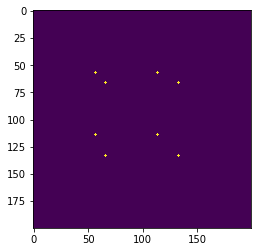

In [105]:
nps = rotate_points(cube, zalpha=3.14/2*0)
img = draw_points(nps, 200)
plt.imshow(img);

In [8]:
sq2 = math.sqrt(1/2)
light = np.array([[0, sq2, sq2]])
light = np.array([[0], [1], [0]])
bins = np.array(list(range(256))).astype('int')/256


for i in range(0, 300):
    angl = 3.14*2/100*i
    nps = donut
    nps = rotate_points(donut, zalpha=angl, xalpha=angl, yalpha=angl)
    normals = rotate_points(donut_normal, zalpha=angl, xalpha=angl, yalpha=angl)
    # light = rotate_points(light, zalpha=angl, xalpha=angl, yalpha=angl)
    # lighted = normals@np.expand_dims(light.squeeze(0), axis=-1)
    lighted = normals@light
    colors = np.digitize(lighted, bins).squeeze(-1).astype('int')
    img = draw_points(nps, 200, colors=None)
    cv2.imshow('slika', img)
    h = cv2.waitKey(25)
    print(i, end='\r')

cv2.destroyAllWindows()

299

In [119]:
x = np.array([0.2, 6.4, 3.0, 1.6, 255])

bins = np.array(list(range(256))).astype('int')/256

inds = np.digitize(x, bins)
inds

array([ 52, 256, 256, 256, 256])

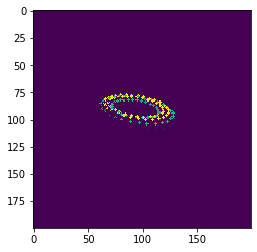

In [164]:
cv2.destroyAllWindows()
img[100:150, 100:150]
plt.imshow(img);

In [170]:
cv2.imshow('slika', imgcat)
h = cv2.waitKey(0)
cv2.destroyAllWindows()

In [169]:
imgcat.shape

(200, 200, 3)